In [27]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [10]:
df = pd.read_csv('./data/corporate_rating.csv')
df.Date = pd.to_datetime(df.Date)
df.loc[df.Rating.isin(['D', 'C', 'CC']), 'Rating'] = 'CCC'

In [3]:
df.head(2)

,Rating,Name,Symbol,Rating Agency Name,Date,Sector,currentRatio,quickRatio,cashRatio,daysOfSalesOutstanding,...,effectiveTaxRate,freeCashFlowOperatingCashFlowRatio,freeCashFlowPerShare,cashPerShare,companyEquityMultiplier,ebitPerRevenue,enterpriseValueMultiple,operatingCashFlowPerShare,operatingCashFlowSalesRatio,payablesTurnover
0,A,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2015-11-27,Consumer Durables,0.945894,0.426395,0.09969,44.203245,...,0.202716,0.437551,6.810673,9.809403,4.008012,0.049351,7.057088,15.565438,0.058638,3.906655
1,BBB,Whirlpool Corporation,WHR,Egan-Jones Ratings Company,2014-02-13,Consumer Durables,1.033559,0.498234,0.20312,38.991156,...,0.074155,0.541997,8.625473,17.402270,3.156783,0.048857,6.460618,15.914250,0.067239,4.002846


In [32]:
print(f'Numero de empresas avaliadas: {df.Name.nunique()}')
print(f"Numero de observações: {df.shape[0]}")
print(f"Numero de agencias: {df['Rating Agency Name'].nunique()}")
print(f"Observacoes desde {str(df.Date.min().date())} ate {str(df.Date.max().date())}")
print(f"Numero de setores: {df.Sector.nunique()}")

Numero de empresas avaliadas: 593
Numero de observações: 2029
Numero de agencias: 5
Observacoes desde 2005-08-16 ate 2016-12-23
Numero de setores: 12


In [31]:
df['Rating Agency Name'].
unique()

array(['Egan-Jones Ratings Company', 'Fitch Ratings',
       "Standard & Poor's Ratings Services", "Moody's Investors Service",
       'DBRS'], dtype=object)

In [23]:
df2plot = df.groupby(by=['Sector'],as_index=False).count()
df2plot.rename(columns={'Name':'count'}, inplace=True)
df2plot[['Sector', 'count']].to_excel('./data/to_plot.xlsx', index=False)

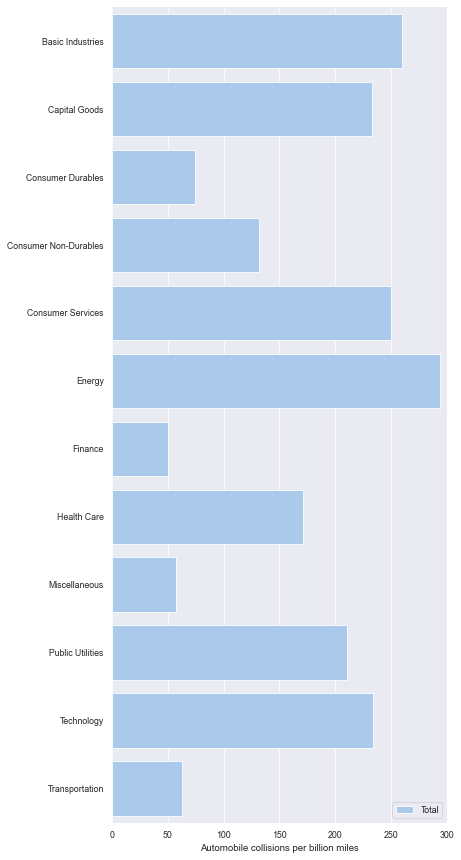

In [30]:
sns.set_theme(style="darkgrid")
# sns.set_context("paper")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(6, 15))

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="count", y="Sector", data=df2plot,
            label="Total", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(xlim=(0, 300), ylabel="",
       xlabel="Distribuição de ")
sns.despine(left=True, bottom=True)

In [35]:
df.groupby(by=['Rating'],as_index=True).count()[['Name']]

,Name
Rating,
A,398
AA,89
AAA,7
B,302
BB,490
BBB,671
CCC,72


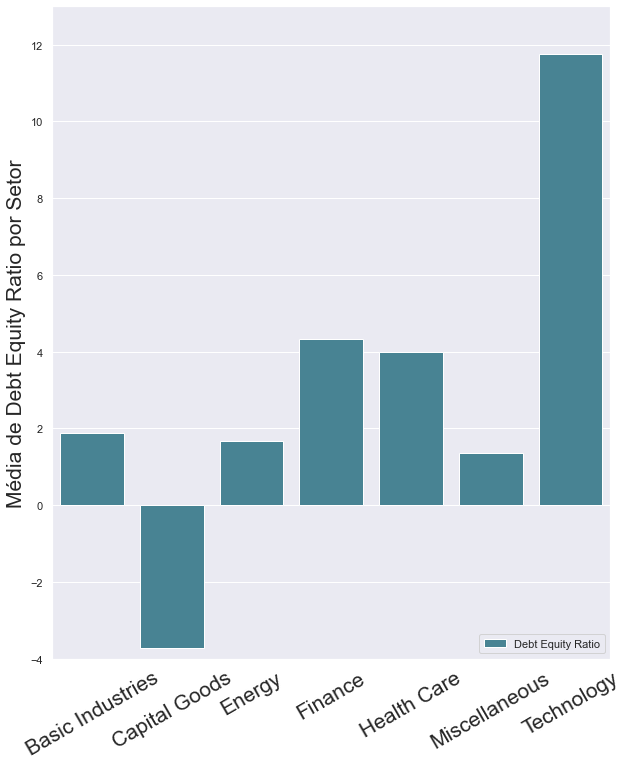

In [63]:
df2plot = df.groupby(by=['Sector'],as_index=False).agg({'debtEquityRatio':'mean'})
df2plot = df2plot.iloc[[0,1,5,6,7,8,10]]
sns.set_theme(style="darkgrid")
# sns.set_context("paper")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(10, 12))

# Plot the total crashes
# sns.set_color_codes("pastel")
# sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True)
sns.barplot(y="debtEquityRatio", x="Sector", data=df2plot,
            label="Debt Equity Ratio", color="#3B8AA0")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="lower right", frameon=True)
ax.set(ylim=(-4, 13), xlabel="")
# plt.xlabel('', fontsize=18)
plt.ylabel('Média de Debt Equity Ratio por Setor', fontsize=21)
plt.xticks(rotation=30, fontsize=21)
# sns.despine(left=True, bottom=True)

plt.savefig('./images/debtEquity_Sector.png', dpi=600)